# SPICED Academy ///  Project Week 04 /// Web Scraping and Text Processing

***

## I. Define goal

The goal of this project is to develop a text classifier that predicts the probability of a song being rightously classified to a certain artist, in this case MacMiller and James Blake. Those two artist were picked because they are my current favourite musicians. In concrete, the albums "Friends that break your heart" (by James Blake) and "Circles" (by Mac Miller) were compared. 

***

## II. Import libraries 

In [1]:
#data processing and general
import pandas as pd
import json
import pprint

#web scraping
import api_key
import lyricsgenius as genius
import re

#feature engineering
import nltk 
from nltk.tokenize import TreebankWordTokenizer 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#machine learning models
from sklearn.naive_bayes import MultinomialNB

#metrics
import sklearn.metrics as metrics

***

## III. Import and transform data

*Requesting access from Genius*

In [2]:
#access token from Genius
client_access_token = api_key.your_client_access_token
genius = genius.Genius(client_access_token)

***

*Understanding the functionalities of LyricsGenius*

In [3]:
#accessing a couple of songs from James Blake
JamesBlake = genius.search_artist("James Blake", 6)

Searching for songs by James Blake...

Song 1: "Retrograde"
Song 2: "Mile High"
Song 3: "Life Round Here (Remix)"
Song 4: "Life Round Here"
Song 5: "Barefoot in the Park"
Song 6: "Overgrown"

Reached user-specified song limit (6).
Done. Found 6 songs.


In [4]:
#printing the song lyrics
for song in JamesBlake.songs:
    print(song.lyrics)

[Intro: Humming]

[Verse]
You're on your own
In a world you've grown
Few more years to go
Don't let the hurdle fall
So be the girl you loved
Be the girl you loved

[Pre Chorus]
I'll wait
So show me why you’re strong
Ignore everybody else
We're alone now
I'll wait
So show me why you’re strong
Ignore everybody else
We’re alone now

[Chorus]
Suddenly I'm hit
It's the starkness of the dawn
And your friends are gone
And your friends won’t come
So show me where you fit
So show me where you fit
[Pre Chorus]
I'll wait
So show me why you're strong
Ignore everybody else
We’re alone now (We’re alone now)
I'll wait (We’re alone now)
(We’re alone now)
(We’re alone now)
I'll wait (We’re alone now)
(We’re alone now)
(We’re alone now)
(We’re alone now)
(We’re alone now)

[Chorus]
Suddenly I'm hit (uuuuuhhhh)
It's the starkness of the dawn
And your friends are gone
And your friends won’t come
So show me where you fit
So show me where you fit122EmbedShare URLCopyEmbedCopy
[Intro: James Blake]
Don't wann

In [5]:
#searching for one specific song
song = genius.search_song("James Blake", "Famous last words")

Searching for "James Blake" by Famous last words...
Done.


In [6]:
#printing the lyrics of "Limit to your love" by "James Blake"
print(song.lyrics)

[Verse 1]
And I can't believe I'm still talkin' about you, that feeling
I should have lost it, I should have lost it by now
I can't believe I'm still holding out and seeing signs
I've truly lost it, I've truly lost it this time

[Chorus]
Ooh, you're the last
Ooh, you're the last of my old things
Ooh, the cast from my broken limbs

[Verse 2]
I can't believe I'm still walkin' around a believer
I should have lost it, I should have lost it by now
And I can't believe I'm still makin' excuses for your crimes
I've truly lost it, I've truly lost it this time

[Chorus]
Ooh, you're the last
Ooh, you're the last of my old things
Ooh, the cast from my broken limbs

[Bridge]
You're the famous last words
I wish I nеver uttered
That I wish I nеver stuttered
But I wish I kept tied to me
[Chorus]
Ooh, you're the last
Ooh, you're the last of my old things
Ooh, the cast from my broken limbs
Ooh, you're the last
Ooh, you're the last of my old things
Ooh, the cast from my broken limbsEmbedShare URLCopyEmbe

<font color = 'blue'> Summary of LyricsGenius </font> In order to use the lyrics for the machine learning model, the text has to be cleaned. In concrete, `\n` and word phrases like `[Verse 1]` have to be filtered out.

***

*Accessing the albums "Friends that break your heart" by James Blake and "Circles" by Mac Miller*

In [7]:
#saving the lyrics of the album "Friends that break your heart" by "James Blake" as json file
#album = genius.search_album("Friends that break your heart", "James Blake")
#album.save_lyrics

In [8]:
#saving the lyrics of the album "Circles" by "Mac Miller" as json file
#album = genius.search_album("Circles", "Mac Miller")
#album.save_lyrics

***

*Converting the json files into dataframes (James Blake)*

In [9]:
#opening the json files
with open('Lyrics_FriendsThatBreakYourHeart.json', 'r') as read_file:
    jamesblake_json = json.load(read_file)

In [10]:
#understanding the structure of the json file
pprint.pprint(jamesblake_json['tracks'][0]['song']['lyrics'])

('[Verse 1]\n'
 "And I can't believe I'm still talkin' about you, that feeling\n"
 'I should have lost it, I should have lost it by now\n'
 "I can't believe I'm still holding out and seeing signs\n"
 "I've truly lost it, I've truly lost it this time\n"
 '\n'
 '[Chorus]\n'
 "Ooh, you're the last\n"
 "Ooh, you're the last of my old things\n"
 'Ooh, the cast from my broken limbs\n'
 '\n'
 '[Verse 2]\n'
 "I can't believe I'm still walkin' around a believer\n"
 'I should have lost it, I should have lost it by now\n'
 "And I can't believe I'm still makin' excuses for your crimes\n"
 "I've truly lost it, I've truly lost it this time\n"
 '\n'
 '[Chorus]\n'
 "Ooh, you're the last\n"
 "Ooh, you're the last of my old things\n"
 'Ooh, the cast from my broken limbs\n'
 '\n'
 '[Bridge]\n'
 "You're the famous last words\n"
 'I wish I nеver uttered\n'
 'That I wish I nеver stuttered\n'
 'But I wish I kept tied to me\n'
 '\n'
 '[Chorus]\n'
 "Ooh, you're the last\n"
 "Ooh, you're the last of my old thin

In [11]:
#understanding the structure of the json file
pprint.pprint(jamesblake_json['tracks'][0])

{'number': 1,
 'song': {'_type': 'song',
          'annotation_count': 8,
          'api_path': '/songs/7031975',
          'artist': 'James Blake',
          'full_title': 'Famous Last Words by\xa0James\xa0Blake',
          'header_image_thumbnail_url': 'https://images.genius.com/9cf51d99b552cf4c8ca56c13fcbb24b4.300x300x1.png',
          'header_image_url': 'https://images.genius.com/9cf51d99b552cf4c8ca56c13fcbb24b4.1000x1000x1.png',
          'id': 7031975,
          'instrumental': False,
          'lyrics': '[Verse 1]\n'
                    "And I can't believe I'm still talkin' about you, that "
                    'feeling\n'
                    'I should have lost it, I should have lost it by now\n'
                    "I can't believe I'm still holding out and seeing signs\n"
                    "I've truly lost it, I've truly lost it this time\n"
                    '\n'
                    '[Chorus]\n'
                    "Ooh, you're the last\n"
                    "Ooh, you

In [12]:
#writing an empty list
list_jamesblake = []

In [13]:
#slicing out the lyrics and the artist's name and fill them into the empty list
for track in jamesblake_json['tracks']:
    X = track['song']['lyrics']
    y = track['song']['artist']
    list_jamesblake.append([X,y])

In [14]:
#inspecting the filled list
list_jamesblake

[["[Verse 1]\nAnd I can't believe I'm still talkin' about you, that feeling\nI should have lost it, I should have lost it by now\nI can't believe I'm still holding out and seeing signs\nI've truly lost it, I've truly lost it this time\n\n[Chorus]\nOoh, you're the last\nOoh, you're the last of my old things\nOoh, the cast from my broken limbs\n\n[Verse 2]\nI can't believe I'm still walkin' around a believer\nI should have lost it, I should have lost it by now\nAnd I can't believe I'm still makin' excuses for your crimes\nI've truly lost it, I've truly lost it this time\n\n[Chorus]\nOoh, you're the last\nOoh, you're the last of my old things\nOoh, the cast from my broken limbs\n\n[Bridge]\nYou're the famous last words\nI wish I nеver uttered\nThat I wish I nеver stuttered\nBut I wish I kept tied to me\n\n[Chorus]\nOoh, you're the last\nOoh, you're the last of my old things\nOoh, the cast from my broken limbs\nOoh, you're the last\nOoh, you're the last of my old things\nOoh, the cast from

In [15]:
#creating a dataframe from the list
df_jamesblake = pd.DataFrame(list_jamesblake, columns=['X', 'y'])
df_jamesblake

,X,y
0,[Verse 1]\nAnd I can't believe I'm still talki...,James Blake
1,[Intro]\nDaytrip took it to ten (Hey)\n\n[Vers...,James Blake
2,[Intro: James Blake]\nCan't stick to that\nCan...,James Blake
3,[Verse 1]\nI hold my ear to a shell\nI hear so...,James Blake
4,[Intro: James Blake]\nI've been losing all of ...,James Blake
5,"[Pre-Chorus]\nLover, is it alright, the way it...",James Blake
6,"[Intro]\nMetro\n\n[Verse 1]\nIt was built, in ...",James Blake
7,[Chorus]\nShow me\nI wish you'd show me\nShow ...,James Blake
8,"[Intro]\nYeah, alright (Woo-hoo)\nTwo, three\n...",James Blake
9,[Intro]\nWhatever makes you\nWhatever makes yo...,James Blake


***

*Converting the json files into dataframes (Mac Miller)*

In [16]:
#opening the json files
with open('Lyrics_Circles.json', 'r') as read_file:
    macmiller_json = json.load(read_file)

In [17]:
#understanding the structure of the json file
pprint.pprint(macmiller_json['tracks'][0]['song']['lyrics'])

('[Verse]\n'
 'Well, this is what it look like right before you fall\n'
 "Stumblin' around, you've been guessing\u2005your\u2005direction\n"
 "Next step, you\u2005can't see at all\n"
 "And I don't\u2005have a name, I don't have a name, no\n"
 'Who am I to blame? Who am I to blame though?\n'
 'And I cannot be changed, I cannot be changed, no\n'
 "Trust me, I've tried\n"
 'I just end up right at the start of the line\n'
 "Drawin' circles\n"
 'Mmm\n'
 'Well, I drink my whiskey, and you sip your wine\n'
 "We're doing well, sittin', watchin' the world fallin' down, its decline\n"
 'And I can keep you safe, I can keep you safe, mmm\n'
 'Do not be afraid, do not be afraid\n'
 "You're feeling sorry, I'm feeling fine\n"
 "Don't you put any more stress on yourself, it's one day at a time\n"
 "It's gettin' pretty late, gettin' pretty late\n"
 'Damn, and I find\n'
 "It goes around like the hands that keep countin' the time\n"
 "Drawin' circles")


In [18]:
#understanding the structure of the json file
pprint.pprint(macmiller_json['tracks'][0])

{'number': 1,
 'song': {'_type': 'song',
          'annotation_count': 11,
          'api_path': '/songs/4844376',
          'artist': 'Mac Miller',
          'full_title': 'Circles by\xa0Mac\xa0Miller',
          'header_image_thumbnail_url': 'https://images.genius.com/f5528ff2f79b8c9aaf79f41beaea2379.300x300x1.jpg',
          'header_image_url': 'https://images.genius.com/f5528ff2f79b8c9aaf79f41beaea2379.1000x1000x1.jpg',
          'id': 4844376,
          'instrumental': False,
          'lyrics': '[Verse]\n'
                    'Well, this is what it look like right before you fall\n'
                    "Stumblin' around, you've been guessing\u2005your\u2005"
                    'direction\n'
                    "Next step, you\u2005can't see at all\n"
                    "And I don't\u2005have a name, I don't have a name, no\n"
                    'Who am I to blame? Who am I to blame though?\n'
                    'And I cannot be changed, I cannot be changed, no\n'
            

In [19]:
#writing an empty list
list_macmiller = []

In [20]:
#slicing out the lyrics and the artist's name and fill them into the empty list
for track in macmiller_json['tracks']:
    X = track['song']['lyrics']
    y = track['song']['artist']
    list_macmiller.append([X,y])

In [21]:
#inspecting the filled list
list_macmiller

[["[Verse]\nWell, this is what it look like right before you fall\nStumblin' around, you've been guessing\u2005your\u2005direction\nNext step, you\u2005can't see at all\nAnd I don't\u2005have a name, I don't have a name, no\nWho am I to blame? Who am I to blame though?\nAnd I cannot be changed, I cannot be changed, no\nTrust me, I've tried\nI just end up right at the start of the line\nDrawin' circles\nMmm\nWell, I drink my whiskey, and you sip your wine\nWe're doing well, sittin', watchin' the world fallin' down, its decline\nAnd I can keep you safe, I can keep you safe, mmm\nDo not be afraid, do not be afraid\nYou're feeling sorry, I'm feeling fine\nDon't you put any more stress on yourself, it's one day at a time\nIt's gettin' pretty late, gettin' pretty late\nDamn, and I find\nIt goes around like the hands that keep countin' the time\nDrawin' circles",
  'Mac Miller'],
 ["[Verse 1]\nOutside is cloudy, but I like that better (Better, better)\nBehind the wheel, but still ain't\u2005o

In [22]:
#creating a dataframe from the list
df_macmiller = pd.DataFrame(list_macmiller, columns=['X', 'y'])

***

In [23]:
#concate both dataframes
frames = [df_jamesblake, df_macmiller]
df = pd.concat(frames)
df

,X,y
0,[Verse 1]\nAnd I can't believe I'm still talki...,James Blake
1,[Intro]\nDaytrip took it to ten (Hey)\n\n[Vers...,James Blake
2,[Intro: James Blake]\nCan't stick to that\nCan...,James Blake
3,[Verse 1]\nI hold my ear to a shell\nI hear so...,James Blake
4,[Intro: James Blake]\nI've been losing all of ...,James Blake
5,"[Pre-Chorus]\nLover, is it alright, the way it...",James Blake
6,"[Intro]\nMetro\n\n[Verse 1]\nIt was built, in ...",James Blake
7,[Chorus]\nShow me\nI wish you'd show me\nShow ...,James Blake
8,"[Intro]\nYeah, alright (Woo-hoo)\nTwo, three\n...",James Blake
9,[Intro]\nWhatever makes you\nWhatever makes yo...,James Blake


***

## IV. Feature Engineering

*Cleaning the dataframe*

In [24]:
#cleaning the dataframe
df['X'] = df['X'].str.replace('\n',' ', regex = True) #removes all newlines 
df['X'] = df['X'].str.replace(',',' ', regex = True) #removes all commas
df['X'] = df['X'].str.replace(r"\(.*\)"," ") #removes brackets and everything that is inside of it
df['X'] = df['X'].str.replace(r"\[.*\]"," ") #removes squared brackets and everything that is inside of it
df['X'] = df['X'].str.lower() #lowers all words in X
df['y'] = df['y'].str.lower() #lowers all words in y
df['y'] = df['y'].str.replace(' ','', regex = True) #removes the whitespace in y
df.reset_index(drop=True, inplace=True) #reseting the index

/var/folders/n_/f0kktvdx00s93tvvh3xlcch40000gn/T/ipykernel_4103/2621719809.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['X'] = df['X'].str.replace(r"\(.*\)"," ") #removes brackets and everything that is inside of it
/var/folders/n_/f0kktvdx00s93tvvh3xlcch40000gn/T/ipykernel_4103/2621719809.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['X'] = df['X'].str.replace(r"\[.*\]"," ") #removes squared brackets and everything that is inside of it


***

*Tokenization*

In [25]:
#instantiate TreebankWordTokenizer
nltk = TreebankWordTokenizer() 

In [26]:
#transform X into tokens / James Blake
df['X'] = df['X'].apply(nltk.tokenize)
df

,X,y
0,"[ooh, you, 're, the, last, ooh, you, 're, the,...",jamesblake
1,"[life, is, not, the, same, if, we, 're, miles,...",jamesblake
2,"[so, i, 'm, coming, back, coming, back, tail, ...",jamesblake
3,"[and, i, know, this, feeling, too, well, of, b...",jamesblake
4,"[yes, i, wo, n't, lie, just, come, closer, you...",jamesblake
5,"[i, 'm, so, blessed, you, 're, mine, i, 'm, so...",jamesblake
6,"[and, it, 's, okay, i, know, i, 'll, be, repla...",jamesblake
7,"[show, me, i, wish, you, 'd, show, me, show, me]",jamesblake
8,"[yeah, alright]",jamesblake
9,"[i, fell, right, in, i, fell, right, in, with,...",jamesblake


***

*Lemmatization*

In [27]:
#import wordnet
nltk.download("wordnet")

AttributeError: 'TreebankWordTokenizer' object has no attribute 'download'

In [ ]:
#define function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join(lemmatizer.lemmatize(token) for token in text)

In [ ]:
#lematize all colomns of every df_artist
df['X'] = df['X'].apply(lemmatize_text)
df

,X,y
0,ooh you 're the last ooh you 're the last of m...,jamesblake
1,life is not the same if we 're mile away i wa ...,jamesblake
2,so i 'm coming back coming back tail between m...,jamesblake
3,and i know this feeling too well of being aliv...,jamesblake
4,yes i wo n't lie just come closer you 'd think...,jamesblake
5,i 'm so blessed you 're mine i 'm so blessed y...,jamesblake
6,and it 's okay i know i 'll be replaced a bitt...,jamesblake
7,show me i wish you 'd show me show me,jamesblake
8,yeah alright,jamesblake
9,i fell right in i fell right in with you i fel...,jamesblake


In [ ]:
#transform the dataframe series into lists
X = df['X'].to_list()
y = df['y'].to_list()

***

*TfidfVectorizer*

In [ ]:
#defining stopwords
stopwords = stopwords.words('english')

In [ ]:
#instanciate TfidVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords)

In [ ]:
#fit & transform X_artist 
X = vectorizer.fit_transform(X)
print(X)

  (0, 86)	0.23953433345091837
  (0, 16)	0.23953433345091837
  (0, 20)	0.23953433345091837
  (0, 135)	0.21198745613661243
  (0, 100)	0.19244263564063913
  (0, 79)	0.47906866690183675
  (0, 102)	0.7186030003527552
  (1, 126)	0.20571245036388539
  (1, 72)	0.20571245036388539
  (1, 148)	0.18205515017413892
  (1, 41)	0.41142490072777077
  (1, 21)	0.41142490072777077
  (1, 143)	0.36411030034827785
  (1, 5)	0.41142490072777077
  (1, 91)	0.36411030034827785
  (1, 84)	0.33054005713324586
  (2, 75)	0.0804487770716657
  (2, 74)	0.0804487770716657
  (2, 7)	0.0804487770716657
  (2, 62)	0.0804487770716657
  (2, 146)	0.0804487770716657
  (2, 43)	0.1608975541433314
  (2, 17)	0.0804487770716657
  (2, 78)	0.04881682315102512
  (2, 48)	0.0804487770716657
  :	:
  (20, 78)	0.8764659297695732
  (21, 157)	1.0
  (22, 104)	0.19267504085561504
  (22, 67)	0.3853500817112301
  (22, 82)	0.3853500817112301
  (22, 53)	0.3853500817112301
  (22, 147)	0.3853500817112301
  (22, 6)	0.19267504085561504
  (22, 142)	0.15479

***

## V. Splitting the data in train, validation and test data

*Splitting the data*

In [ ]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 25) # 0.25 x 0.8 = 0.2

In [ ]:
X_train.shape

(14, 161)

In [ ]:
#checking if the splitting worked
y_train

['macmiller',
 'macmiller',
 'jamesblake',
 'macmiller',
 'jamesblake',
 'jamesblake',
 'jamesblake',
 'macmiller',
 'macmiller',
 'macmiller',
 'jamesblake',
 'jamesblake',
 'macmiller',
 'jamesblake']

***

## VI. Classification Model 

*Applying a Naive Bayes model*

In [ ]:
#applying 
m = MultinomialNB() 

In [ ]:
#train the model 
m.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#test the model score
m.score(X_train, y_train)

0.9285714285714286

In [ ]:
#test the model score
m.score(X_val, y_val)

0.6

In [ ]:
y_pred = m.predict(X_val)

***

*Metrics scores*

In [ ]:
#accuracy
round(metrics.accuracy_score(y_val, y_pred),2)

0.6

In [ ]:
#precision
round(metrics.precision_score(y_val, y_pred, pos_label='macmiller'), 2)

0.67

In [ ]:
#recall
round(metrics.recall_score(y_val, y_pred,pos_label='macmiller'), 2)

0.67

In [ ]:
#f1
round(metrics.f1_score(y_val, y_pred, pos_label='macmiller'), 2)

0.67

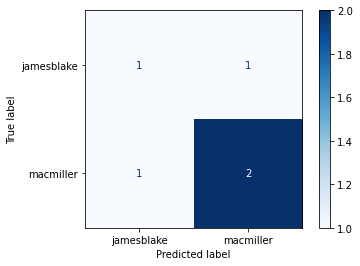

In [ ]:
#applying a confusion matrix 
metrics.confusion_matrix(y_val, y_pred)
metrics.plot_confusion_matrix(m, X_val, y_val, cmap='Blues')

***

## VII. Calculate test-score

*Calculating the model scores for all data sets*

In [ ]:
#calculating the model score using y_test
round(m.score(X_test, y_test),2)

0.4

In [ ]:
y_pred = m.predict(X_test)

***

*Metrics scores*

In [ ]:
#accuracy
round(metrics.accuracy_score(y_test, y_pred),2)

0.4

In [ ]:
#precision
round(metrics.precision_score(y_test, y_pred, pos_label='macmiller'), 2)

0.0

In [ ]:
#recall
round(metrics.recall_score(y_test, y_pred, pos_label='macmiller'), 2)

0.0

In [ ]:
#f1
round(metrics.f1_score(y_test, y_pred, pos_label='macmiller'), 2)

0.0

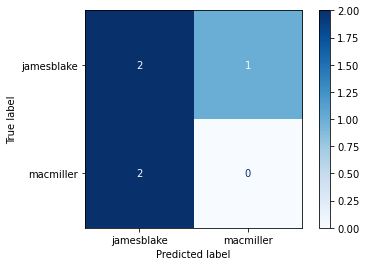

In [ ]:
#applying a confusion matrix 
metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(m, X_test, y_test, cmap='Blues')

<font color = 'blue'> Summary of Naive Bayes Model </font> Interestingly, the scores of the model always change dramatically depending the random state. As the data sample is so small (approximatley 12 songs for each artists), the high variance is also not surprising. 

***

## VIII. Calculating the probability of unseen lyrics

In [ ]:
#creating a new dataset //// using the lyrics from 'limit to your love' by James Blake 
unseen_data = ['There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love Your love your love your love There s a limit to you care So carelessly there is it truth or dare There s a limit to your care There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love']
unseen_data = pd.DataFrame(unseen_data)
print(unseen_data )

                                                   0
0  There s a limit to your love Like a waterfall ...


***

*Tokenize*

In [ ]:
#transform unseen_data into tokens 
unseen_data[0] = unseen_data[0].apply(nltk.tokenize)

***

*Lemmatize and tansform to list*

In [ ]:
#lematize all colomns of every df_artist
unseen_data[0] = unseen_data[0].apply(lemmatize_text)

#transform to list 
unseen_data = unseen_data[0].to_list()
print(unseen_data)

['There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love Your love your love your love There s a limit to you care So carelessly there is it truth or dare There s a limit to your care There s a limit to your love Like a waterfall in slow motion Like a map with no ocean There s a limit to your love']


***

*TfidfVectorizer*

In [ ]:
#fit & transform unseen_data
unseen_data = vectorizer.transform(unseen_data)
print(unseen_data)

  (0, 90)	0.836020655820209
  (0, 85)	0.47772608904011943
  (0, 19)	0.26990229138038024


In [ ]:
unseen_data.shape

(1, 161)

***

*Model prediction*

In [ ]:
#model
m.predict(unseen_data)

array(['macmiller'], dtype='<U10')

In [ ]:
m.predict_proba(unseen_data)

array([[0.38635854, 0.61364146]])

<font color = 'blue'> Summary </font> The model predicts that there is a 61% probabiliy of the unseen lyrics belonging to MacMiller. Unfortunatly, the inserted lyrics are written by James Blake, not Macmiller. There are three possible reasons; 1) training set is too small; 2) lyrics of the two artists are too similiar and/or 3) the model is not sufficient enough. 